In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

# 4. Exploratory data analysis

In [2]:
# Data Loading

In [3]:
company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
#Data Preprocess

In [6]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
company_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [8]:
company_df.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [9]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
trips_df['average_trips'] = trips_df['average_trips'].apply(np.ceil).astype('int')
trips_df

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
...,...,...
89,Mount Greenwood,4
90,Hegewisch,4
91,Burnside,3
92,East Side,2


In [11]:
trips_df.describe()

,average_trips
count,94.000000
mean,600.457447
std,1714.553948
min,2.000000
25%,15.000000
50%,52.500000
75%,299.750000
max,10728.000000


In [12]:
trips_df.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [13]:
#identify the top 10 neighborhoods in terms of drop-offs
top_10_dropoff = trips_df.sort_values('average_trips', ascending=False).head(10)
top_10_dropoff

,dropoff_location_name,average_trips
0,Loop,10728
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1365
9,Sheffield & DePaul,1260


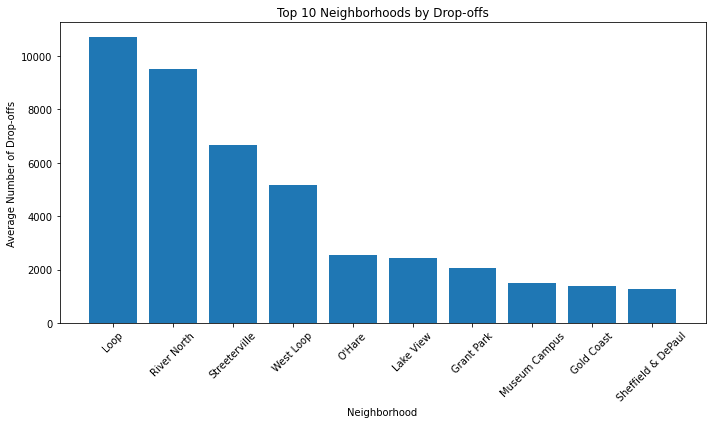

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'])
plt.xlabel('Neighborhood')
plt.ylabel('Average Number of Drop-offs')
plt.title('Top 10 Neighborhoods by Drop-offs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The most popular dropoff location is occupied by Loop, with an average_trips at 10728, while the least popular is Sheffield & DePaul with an average_trips at 1260

In [15]:
top_10_companies = company_df.sort_values('trips_amount', ascending=False).head(10)
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


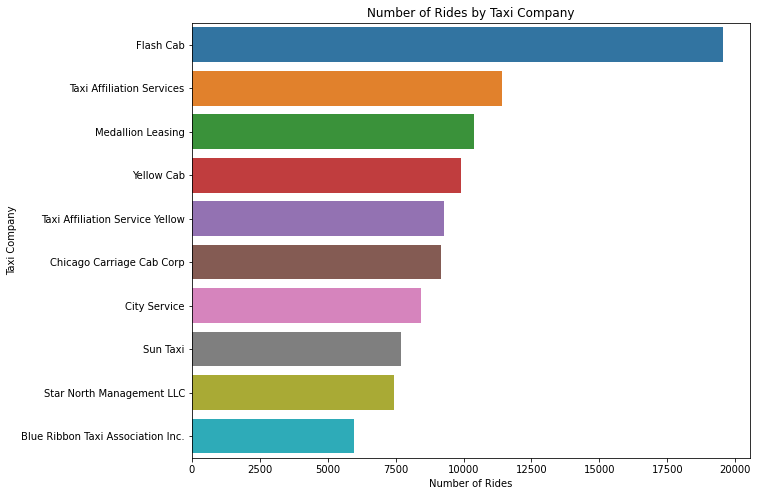

In [16]:
plt.figure(figsize=(10, 8))
sns.barplot(data=top_10_companies, y='company_name', x='trips_amount', orient='h');
plt.ylabel('Taxi Company')
plt.xlabel('Number of Rides')
plt.title('Number of Rides by Taxi Company')
plt.show()

The taxi company that has the largest number of trips is occupied by Flash Cab with a trips_amount at 19558 While the least number of trips is occupied by Blue Ribbon Taxi Association Inc., with a trips_amount at 5953

# 5. Testing hypotheses

In [17]:
#Load Data

In [18]:
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [19]:
#Data Preprocess

In [20]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [21]:
loop_ohare.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [22]:
#months recorded in data
pd.to_datetime(loop_ohare['start_ts']).dt.month.value_counts()

11    1068
Name: start_ts, dtype: int64

In [23]:
#days recorded in data
pd.to_datetime(loop_ohare['start_ts']).dt.day.value_counts()

11    426
4     367
18    180
25     95
Name: start_ts, dtype: int64

In [24]:
#conditions spread
loop_ohare['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

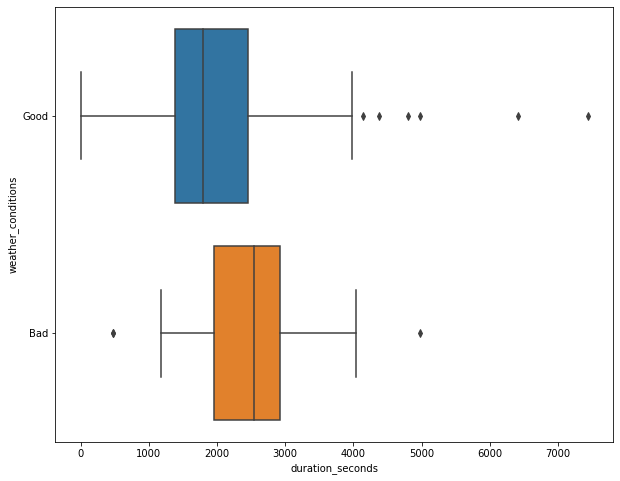

In [25]:
#check for outliers
plt.figure(figsize=(10, 8))
sns.boxplot(x='duration_seconds', y='weather_conditions', data=loop_ohare);
plt.show()

In [26]:
Q1 = loop_ohare['duration_seconds'].quantile(0.25)
Q3 = loop_ohare['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

if lower_bound < 0:
    lower_bound = 0

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Q1: 1438.25, Q3: 2580.0, IQR: 1141.75, Lower Bound: 0, Upper Bound: 4292.625


In [27]:
#remove outliers
loop_ohare_non_outliers = loop_ohare[(loop_ohare['duration_seconds']>lower_bound) & (loop_ohare['duration_seconds']<upper_bound)]
loop_ohare_non_outliers.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [28]:
#Test the following hypotheses:
#The average trip duration from the Loop to O'Hare International Airport has been changed on rainy days at Saturdays.

H0: The average trip duration from the Loop to O'Hare International Airport is SAME on Saturday.

H1: Average trip duration from the Loop to O'Hare International Airport are not same on Saturday.

In [29]:
good_weather_data = loop_ohare_non_outliers[loop_ohare_non_outliers['weather_conditions']=='Good'].reset_index(drop=True)
bad_weather_data = loop_ohare_non_outliers[loop_ohare_non_outliers['weather_conditions']=='Bad'].reset_index(drop=True)

In [30]:
good_weather_duration = good_weather_data['duration_seconds']
bad_weather_duration = bad_weather_data['duration_seconds']

In [31]:
good_weather_duration.mean()

1992.8072976054732

In [32]:
bad_weather_duration.mean()

2412.9441340782123

In [33]:
alpha = 0.05

t_statistic, p_value = st.ttest_ind(good_weather_duration, bad_weather_duration, equal_var=True)
print(t_statistic, p_value)

-7.420560261269632 2.3968233040077725e-13


In [34]:
if(p_value < alpha):
    print("We reject the null hypothesis, sufficient evidence that average trip duration from the Loop to O'Hare International Airport are not same on Saturday")
else:
    print("We accept the null hypothesis, not sufficient evidence that average trip duration from the Loop to O'Hare International Airport are not same on Saturday ")

We reject the null hypothesis, sufficient evidence that average trip duration from the Loop to O'Hare International Airport are not same on Saturday


# 6. Conclusion

- The Flash Cab company the largest number of trips about 19558. Which have a huge gap to other taxi company. 
- However, to get a better comparison, it would be great if we could compare the number of cabs each company owns. Where we may be able to know which company was more efficient.

- The Loop has the most popular dropoff location about 10728 trips. 
- Although River North is second, it has a close number of dropoff of 9524 trips.
- Indicates that particular neighborhoods could be strongly associated with the local population, commercial activities, and attractions within those areas.